# Pandas

pandas extends the numpy ndarray to allow for a data-structure that labels the columns (called a data frame).  You can kind of think about this functionality as operating how a spreadsheet might work.

In this manner, its main competition is R -- the data frame provides the functionality for data analysis that R natively presents.

Nice documentation is here:

http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## series

A series is a labeled array.  It looks superficially like a dictionary, but is fixed size, and can handle missing values.  It also can also be operated on with any numpy operation or the standard operators (a dictionary cannot).  The labels are referred to as the _index_.

Some examples from: http://pandas.pydata.org/pandas-docs/stable/dsintro.html

In [133]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
a = {'a' : 1 ,'b' : 2 ,'c' : 3 ,'d' : 5 ,'e' : 5 , }
s = pd.Series(a)

In [134]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

If you don't specify an index, one will be made up for you

In [135]:
pd.Series(np.random.randn(6))

0    0.725217
1   -0.996302
2    0.359456
3   -0.375293
4   -1.075677
5    1.363602
dtype: float64

you can initialize from a dictionary.  By default it will use the dictionary keys (sorted) as the index

In [136]:
d = {'a' : 0., 'b' : 1., 'c' : 2.}
pd.Series(d)

a    0
b    1
c    2
dtype: float64

In [137]:
pd.Series(d, index=['b', 'c', 'd', 'a'])

b     1
c     2
d   NaN
a     0
dtype: float64

Note that NaN indicates a missing value

you can operate on a series as you would any ndarray

In [138]:
s

a    1
b    2
c    3
d    5
e    5
dtype: int64

In [139]:
s[0]

1

In [140]:
s[:3]

a    1
b    2
c    3
dtype: int64

In [141]:
print(s.median())
s[s > s.median()]

3.0


d    5
e    5
dtype: int64

In [142]:
np.exp(s)

a      2.718282
b      7.389056
c     20.085537
d    148.413159
e    148.413159
dtype: float64

you can also index by label -- this mimics the behavior of a dictionary

In [143]:
s['a']

1

In [144]:
s['e']

5

In [145]:
'e' in s

True

The `get()` method can be used to safely access an element if it is possible it does not exist -- you can specify a default to return in that case.  The alternative is to use a `try` / `except` block.

In [146]:
s.get('f', np.nan)

nan

Operations, like those you use with an ndarray work fine on a Series

In [147]:
s + s

a     2
b     4
c     6
d    10
e    10
dtype: int64

In [148]:
s * 2

a     2
b     4
c     6
d    10
e    10
dtype: int64

note that operations are always done on like labels, so the following is not exactly the same as numpy arrays.  In this sense, pandas results respect the union of indices 

In [149]:
print(s[1:])
print(s[:-1])
s[1:] + s[:-1]

b    2
c    3
d    5
e    5
dtype: int64
a    1
b    2
c    3
d    5
dtype: int64


a   NaN
b     4
c     6
d    10
e   NaN
dtype: float64

a series can have a name

In [150]:
s = pd.Series(np.random.randn(5), name='something')
s

0   -0.539385
1    0.148224
2    0.102371
3   -0.426143
4    0.959444
Name: something, dtype: float64

## DataFrame

The dataframe is like a spreadsheet -- the columns and rows have labels.  It is 2-d.  This is what you will usually use with pandas.

you can initialize from:
  * Dict of 1D ndarrays, lists, dicts, or Series
  * 2-D numpy.ndarray
  * Structured or record ndarray
  * A Series
  * Another DataFrame

In [151]:
d = {'one' : pd.Series([1., 2., 3.], index=['b', 'a', 'c']),
     'two' : pd.Series([2, 1., 3., 4.], index=['b', 'a', 'c', 'd'])}

In [152]:
df = pd.DataFrame(d)
df

,one,two
a,2,1
b,1,2
c,3,3
d,NaN,4


In [153]:
df.mean()

one    2.0
two    2.5
dtype: float64

You can exclude some labels

In [154]:
pd.DataFrame(d, index=['d', 'b', 'a'])

,one,two
d,NaN,4
b,1,2
a,2,1


Here's initialization from lists / ndarrays

In [155]:
d = {'one' : [1., 2., 3., 4.],
     'two' : [4., 3., 2., 1.]}
d

{'one': [1.0, 2.0, 3.0, 4.0], 'two': [4.0, 3.0, 2.0, 1.0]}

In [156]:
pd.DataFrame(d)

,one,two
0,1,4
1,2,3
2,3,2
3,4,1


In [157]:
pd.DataFrame(d, index=['a', 'b', 'c', 'd'])

,one,two
a,1,4
b,2,3
c,3,2
d,4,1


there are lots of other initialization methods, e.g, list of dicts

In [158]:
data2 = [{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]
pd.DataFrame(data2, index=['first', 'second'])

,a,b,c
first,1,2,NaN
second,5,10,20


### working with the dataframe

you can index it as it it were Series objects.  Other access is as follows:

  * Select column: `df[col]` (returns Series)
  * Select row by label: `df.loc[label]` (returns Series)
  * Select row by integer location: `df.iloc[loc]` (returns Series)
  * Slice rows: `df[5:10]` (returns DataFrame)
  * Select rows by boolean vector: `df[bool_vec]` (return DataFrame)

In [159]:
df['one']

a     2
b     1
c     3
d   NaN
Name: one, dtype: float64

In [160]:
df

,one,two
a,2,1
b,1,2
c,3,3
d,NaN,4


In [161]:
type(df['one'])

pandas.core.series.Series

In [162]:
df['three'] = df['one'] * df['two']
df['flag'] = df['one'] > 2
df

,one,two,three,flag
a,2,1,2,False
b,1,2,2,False
c,3,3,9,True
d,NaN,4,NaN,False


you can also treat any index name as if it were a property

In [163]:
df.three

a     2
b     2
c     9
d   NaN
Name: three, dtype: float64

you can delete or pop columns---popping returns a `Series`

In [175]:

del df['two']

KeyError: 'two'

In [176]:
print(df)
three = df.pop('three')


   one   flag  foo
a    2  False  bar
b    1  False  bar
c    3   True  bar
d  NaN  False  bar


KeyError: 'three'

In [177]:
df

,one,flag,foo
a,2,False,bar
b,1,False,bar
c,3,True,bar
d,NaN,False,bar


In [178]:
three

a     2
b     2
c     9
d   NaN
Name: three, dtype: float64

In [168]:
type(three)

pandas.core.series.Series

initializing with a scalar propagates that scalar to all the rows

In [169]:
df['foo'] = 'bar'

In [170]:
df

,one,flag,foo
a,2,False,bar
b,1,False,bar
c,3,True,bar
d,NaN,False,bar


## CSV

you can also read from CSV

Note, if there is stray whitespace in your strings in the CSV, pandas will keep it.  This is a bit annoying, and you might need to investigate converters to get things properly formatted.

There are similar methods for HDF5 and excel

In [223]:
grades = pd.read_csv('sample.csv', index_col ="student", skipinitialspace=True)

In [224]:
grades

,"""hw 1""",hw 2,hw 3,hw 4,exam
student,,,,,
A,10,9,10,7,97
B,8,7,9,9,82
C,NaN,9,6,5,75
D,8,9,9,9,90
E,NaN,10,10,10,95
F,8,2,6,7,66
G,6,NaN,4,5,60
H,8,8,9,8,84
I,10,7,10,10,92


In [225]:
grades.index

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'O', 'P', 'Q'],
      dtype='object', name='student')

In [226]:
grades.columns

Index(['  "hw 1"', 'hw 2', 'hw 3', 'hw 4', 'exam'], dtype='object')

A single student's grades

In [227]:
grades.ix['A']

  "hw 1"    10
hw 2         9
hw 3        10
hw 4         7
exam        97
Name: A, dtype: float64

All the grades for the first homework

In [231]:
grades['hw 1']

KeyError: 'hw 1'

Creating a new column based on the existing ones

In [232]:
grades['hw average'] = (grades['hw 1'] + grades['hw 2'] + grades['hw 3'] + grades['hw 4'])/4.0

KeyError: 'hw 1'

In [233]:
grades

,"""hw 1""",hw 2,hw 3,hw 4,exam
student,,,,,
A,10,9,10,7,97
B,8,7,9,9,82
C,NaN,9,6,5,75
D,8,9,9,9,90
E,NaN,10,10,10,95
F,8,2,6,7,66
G,6,NaN,4,5,60
H,8,8,9,8,84
I,10,7,10,10,92


this didn't handle the missing data properly -- let's replace the NaNs with 0

In [234]:
g2 = grades.fillna(0)

In [235]:
g2['hw average'] = (g2['hw 1'] + g2['hw 2'] + g2['hw 3'] + g2['hw 4'])/4.0

KeyError: 'hw 1'

In [236]:
g2

,"""hw 1""",hw 2,hw 3,hw 4,exam
student,,,,,
A,10,9,10,7,97
B,8,7,9,9,82
C,0,9,6,5,75
D,8,9,9,9,90
E,0,10,10,10,95
F,8,2,6,7,66
G,6,0,4,5,60
H,8,8,9,8,84
I,10,7,10,10,92


For big dataframes, we can view just pieces

In [237]:
g2.head()

,"""hw 1""",hw 2,hw 3,hw 4,exam
student,,,,,
A,10,9,10,7,97
B,8,7,9,9,82
C,0,9,6,5,75
D,8,9,9,9,90
E,0,10,10,10,95


In [238]:
g2.tail(2)

,"""hw 1""",hw 2,hw 3,hw 4,exam
student,,,,,
P,8,9,8,10,94
Q,5,7,6,5,78


### statistics

we can get lots of statistics

In [239]:
g2.describe()

,"""hw 1""",hw 2,hw 3,hw 4,exam
count,17.000000,17.000000,17.000000,17.000000,17.000000
mean,7.000000,7.470588,7.882353,8.000000,85.000000
std,3.221025,2.741296,1.964763,1.732051,11.407235
min,0.000000,0.000000,4.000000,5.000000,60.000000
25%,6.000000,7.000000,6.000000,7.000000,78.000000
50%,8.000000,8.000000,9.000000,9.000000,90.000000
75%,9.000000,9.000000,9.000000,9.000000,94.000000
max,10.000000,10.000000,10.000000,10.000000,99.000000


want to sort by values?

In [240]:
g2.sort_values(by="exam")

,"""hw 1""",hw 2,hw 3,hw 4,exam
student,,,,,
G,6,0,4,5,60
F,8,2,6,7,66
L,3,8,5,7,71
C,0,9,6,5,75
Q,5,7,6,5,78
B,8,7,9,9,82
H,8,8,9,8,84
K,8,7,6,8,87
D,8,9,9,9,90


In [241]:
g2.mean()

  "hw 1"     7.000000
hw 2         7.470588
hw 3         7.882353
hw 4         8.000000
exam        85.000000
dtype: float64

In [242]:
g2.median()

  "hw 1"     8
hw 2         8
hw 3         9
hw 4         9
exam        90
dtype: float64

In [243]:
g2.max()

  "hw 1"    10
hw 2        10
hw 3        10
hw 4        10
exam        99
dtype: float64

In [244]:
g2

,"""hw 1""",hw 2,hw 3,hw 4,exam
student,,,,,
A,10,9,10,7,97
B,8,7,9,9,82
C,0,9,6,5,75
D,8,9,9,9,90
E,0,10,10,10,95
F,8,2,6,7,66
G,6,0,4,5,60
H,8,8,9,8,84
I,10,7,10,10,92


`.apply()` let's you apply a function to the `DataFrame`.  By default, it will work over indices (e.g., applying your function on a column), treating the inputs as a `Series`.  

In [245]:
g2.apply(lambda x: x.max() - x.min())

  "hw 1"    10
hw 2        10
hw 3         6
hw 4         5
exam        39
dtype: float64

### access

Pandas provides optimizes methods for accessing data: .at, .iat, .loc, .iloc, and .ix

The standard slice notation works for rows, but note *when using labels, both endpoints are included*

In [258]:
pop = pd.read_csv('pop.csv', index_col ="Data Source", skipinitialspace=True)

g2["E":"F"]
pop["Egypt,Arab Rep." : ]


,World Development Indicators,Unnamed: 2,Unnamed: 3,1960,1961,1962,1963,1964,1965,1966,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Data Source,,,,,,,,,,,,,,,,,,,,,
"Egypt,Arab Rep.",EGY,"Population, total",SP.POP.TOTL,26996533,27744712,28506176,29281250,30071102,30875964,31697616,...,8.095388e+07,8.246502e+07,8.410761e+07,8.589756e+07,8.781326e+07,8.980743e+07,9.181257e+07,9.377817e+07,95688681,NaN
Euro area,EMU,"Population, total",SP.POP.TOTL,265396502,267825309,270324828,272876447,275382197,277856703,280147494,...,3.342747e+08,3.353609e+08,3.361515e+08,3.354258e+08,3.361673e+08,3.372969e+08,3.384296e+08,3.395192e+08,340894606,NaN
Eritrea,ERI,"Population, total",SP.POP.TOTL,1397491,1432640,1469645,1508273,1548187,1589179,1631147,...,4.232636e+06,4.310334e+06,4.390840e+06,4.474690e+06,NaN,NaN,NaN,NaN,NaN,NaN
Spain,ESP,"Population, total",SP.POP.TOTL,30455000,30739250,31023366,31296651,31609195,31954292,32283194,...,4.595411e+07,4.636295e+07,4.657690e+07,4.674270e+07,4.677306e+07,4.662004e+07,4.648088e+07,4.644770e+07,46443959,NaN
Estonia,EST,"Population, total",SP.POP.TOTL,1211537,1225077,1241623,1258857,1277086,1294566,1308597,...,1.337090e+06,1.334515e+06,1.331475e+06,1.327439e+06,1.322696e+06,1.317997e+06,1.314545e+06,1.315407e+06,1316481,NaN
Ethiopia,ETH,"Population, total",SP.POP.TOTL,22151278,22671190,23221389,23798429,24397024,25013626,25641376,...,8.318489e+07,8.541625e+07,8.770267e+07,9.004676e+07,9.244418e+07,9.488772e+07,9.736677e+07,9.987303e+07,102403196,NaN
European Union,EUU,"Population, total",SP.POP.TOTL,409498463,413007006,416670637,420393293,424075858,427592605,430868372,...,5.018085e+08,5.033180e+08,5.044211e+08,5.040121e+08,5.051043e+08,5.065925e+08,5.081572e+08,5.097033e+08,511497415,NaN
Fragile and conflict affected situations,FCS,"Population, total",SP.POP.TOTL,121765037,124558907,127465500,130492518,133661787,136988867,140486338,...,4.179197e+08,4.282469e+08,4.387379e+08,4.493985e+08,4.602282e+08,4.712531e+08,4.824744e+08,4.939196e+08,505635987,NaN
Finland,FIN,"Population, total",SP.POP.TOTL,4429634,4461005,4491443,4523309,4548543,4563732,4580869,...,5.313399e+06,5.338871e+06,5.363352e+06,5.388272e+06,5.413971e+06,5.438972e+06,5.461512e+06,5.479531e+06,5495096,NaN


In [325]:
g2.loc[:,["hw 1", "exam"]]
pop.loc["Egypt,Arab Rep.",["1960", "1970"]]


1960    2.69965e+07
1970    3.50463e+07
Name: Egypt,Arab Rep., dtype: object

`at` is a faster access method

In [277]:
g2.at["A","exam"]

97

The `i` routines work in index space, similar to how numpy does

In [321]:
a = pop.iloc[69,3:]

a = a / (10**6)
df = pd.DataFrame(a)

df.describe()


,"Egypt,Arab Rep."
count,57.000000
unique,57.000000
top,95.688681
freq,1.000000


In [291]:
g2.iloc[[1,3,5], [1,2,3,4]]

,hw 2,hw 3,hw 4,exam
student,,,,
B,7,9,9,82
D,9,9,9,90
F,2,6,7,66


In [292]:
g2.iat[2,2]

6

### boolean indexing

In [66]:
g2[g2.exam > 90]

,hw 1,hw 2,hw 3,hw 4,exam,hw average
student,,,,,,
A,10.0,9.0,10,7,97,9.00
E,0.0,10.0,10,10,95,7.50
I,10.0,7.0,10,10,92,9.25
J,10.0,6.0,9,9,91,8.50
M,9.0,9.0,8,9,94,8.75
O,10.0,10.0,10,9,99,9.75
P,8.0,9.0,8,10,94,8.75


### np arrays

In [302]:
g2.loc[:, "new"] = np.random.random(len(g2))

In [303]:
g2

,"""hw 1""",hw 2,hw 3,hw 4,exam,new
student,,,,,,
A,10,9,10,7,97,0.146055
B,8,7,9,9,82,0.547417
C,0,9,6,5,75,0.820076
D,8,9,9,9,90,0.253161
E,0,10,10,10,95,0.922951
F,8,2,6,7,66,0.587744
G,6,0,4,5,60,0.010893
H,8,8,9,8,84,0.293270
I,10,7,10,10,92,0.598518


resetting values

In [304]:
a = g2[g2.exam < 80].index

In [305]:
a

Index(['C', 'F', 'G', 'L', 'Q'], dtype='object', name='student')

In [306]:
g2.loc[a, "exam"] = 80

In [307]:
g2

,"""hw 1""",hw 2,hw 3,hw 4,exam,new
student,,,,,,
A,10,9,10,7,97,0.146055
B,8,7,9,9,82,0.547417
C,0,9,6,5,80,0.820076
D,8,9,9,9,90,0.253161
E,0,10,10,10,95,0.922951
F,8,2,6,7,80,0.587744
G,6,0,4,5,80,0.010893
H,8,8,9,8,84,0.293270
I,10,7,10,10,92,0.598518


## histogramming

In [308]:
g2["exam"].value_counts()

80    5
94    2
90    2
95    1
92    1
91    1
87    1
84    1
82    1
99    1
97    1
Name: exam, dtype: int64

## plotting

In [309]:
%matplotlib inline

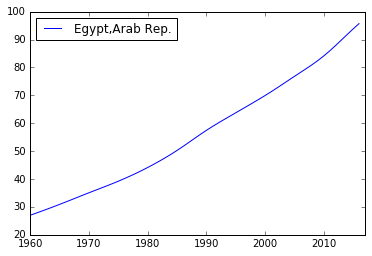

In [326]:
df.plot()

KeyError: 'hw average'

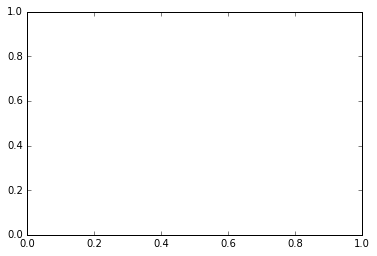

In [311]:
g2.plot.scatter(x="hw average", y="exam", marker="o")

A lot more examples at: http://pandas.pydata.org/pandas-docs/stable/visualization.html

In [312]:
g2

,"""hw 1""",hw 2,hw 3,hw 4,exam,new
student,,,,,,
A,10,9,10,7,97,0.146055
B,8,7,9,9,82,0.547417
C,0,9,6,5,80,0.820076
D,8,9,9,9,90,0.253161
E,0,10,10,10,95,0.922951
F,8,2,6,7,80,0.587744
G,6,0,4,5,80,0.010893
H,8,8,9,8,84,0.293270
I,10,7,10,10,92,0.598518


In [313]:
g2.loc["R", :] = 1

In [314]:
g2

,"""hw 1""",hw 2,hw 3,hw 4,exam,new
student,,,,,,
A,10,9,10,7,97,0.146055
B,8,7,9,9,82,0.547417
C,0,9,6,5,80,0.820076
D,8,9,9,9,90,0.253161
E,0,10,10,10,95,0.922951
F,8,2,6,7,80,0.587744
G,6,0,4,5,80,0.010893
H,8,8,9,8,84,0.293270
I,10,7,10,10,92,0.598518


In [315]:
g2.to_latex()

'\\begin{tabular}{lrrrrrr}\n\\toprule\n{} &    "hw 1" &  hw 2 &  hw 3 &  hw 4 &  exam &       new \\\\\nstudent &           &       &       &       &       &           \\\\\n\\midrule\nA       &        10 &     9 &    10 &     7 &    97 &  0.146055 \\\\\nB       &         8 &     7 &     9 &     9 &    82 &  0.547417 \\\\\nC       &         0 &     9 &     6 &     5 &    80 &  0.820076 \\\\\nD       &         8 &     9 &     9 &     9 &    90 &  0.253161 \\\\\nE       &         0 &    10 &    10 &    10 &    95 &  0.922951 \\\\\nF       &         8 &     2 &     6 &     7 &    80 &  0.587744 \\\\\nG       &         6 &     0 &     4 &     5 &    80 &  0.010893 \\\\\nH       &         8 &     8 &     9 &     8 &    84 &  0.293270 \\\\\nI       &        10 &     7 &    10 &    10 &    92 &  0.598518 \\\\\nJ       &        10 &     6 &     9 &     9 &    91 &  0.056220 \\\\\nK       &         8 &     7 &     6 &     8 &    87 &  0.683969 \\\\\nL       &         3 &     8 &     5 &     7 &